## Importing Different Libraries in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection

In [2]:
# Loading the dataset from csv file to a pandas dataframe

insurance_data = pd.read_csv('C:/Users/negip/insurance.csv')

In [3]:
# Taking first 5 rows from the dataset 

insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Total number of rows and column of dataset

insurance_data.shape

(1338, 7)

In [5]:
# Getting information about the dataset

insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Categorical features in the dataset
 - sex
 - smoker
 - region
 

In [6]:
# Checking for missing values in the dataset

insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [7]:
# statistical measurement of data

insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


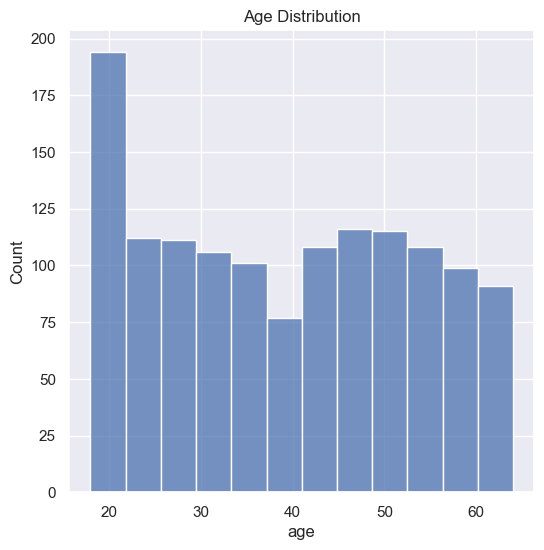

In [8]:
# Distribution of age value

sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

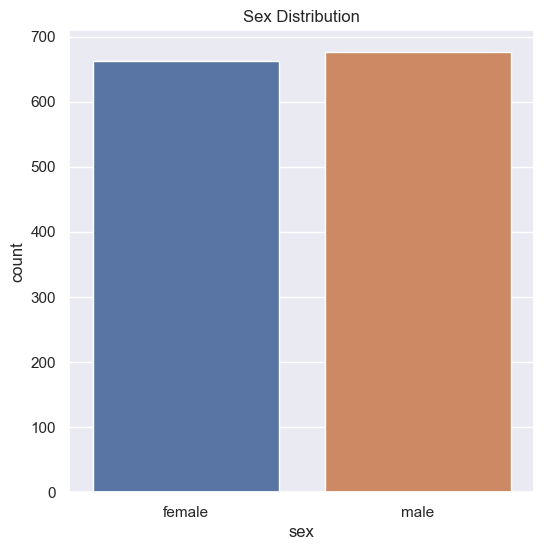

In [9]:
# Counting for gender column

plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_data)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

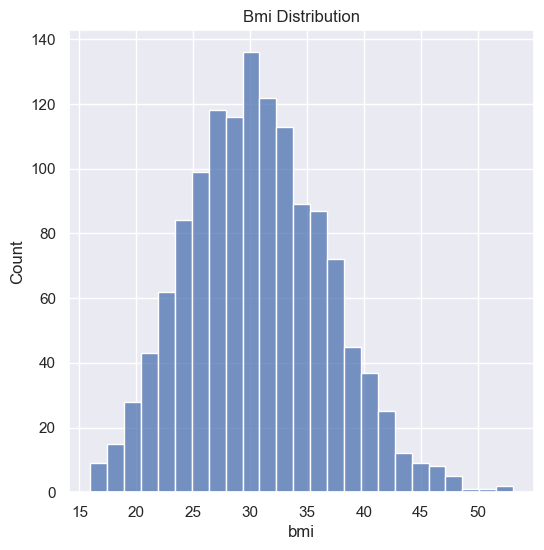

In [11]:
# Distribution of bmi value

plt.figure(figsize=(6,6))
sns.histplot(insurance_data['bmi'])
plt.title('Bmi Distribution')
plt.show()

##### Normal range for BMI is 18.5 to 24.9

- If your BMI is less than 18.5, it falls within the underweight range
- If your BMI is 25.0 to 29.9, it falls within the overweight range
- If your BMI is 30.0 or higher, it falls within the obese range

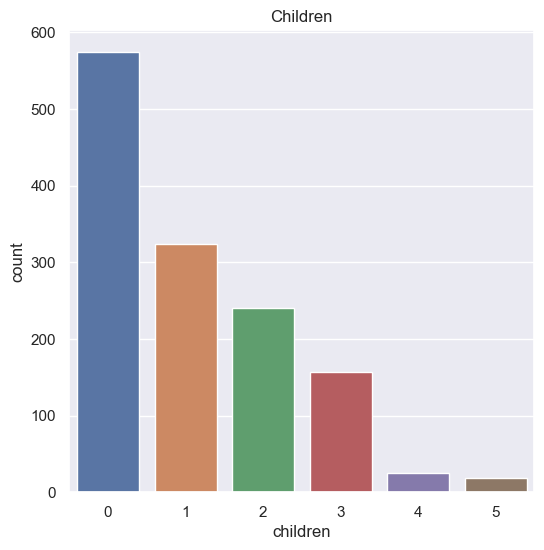

In [12]:
# Counting for children column

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_data)
plt.title('Children')
plt.show()

In [13]:
insurance_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

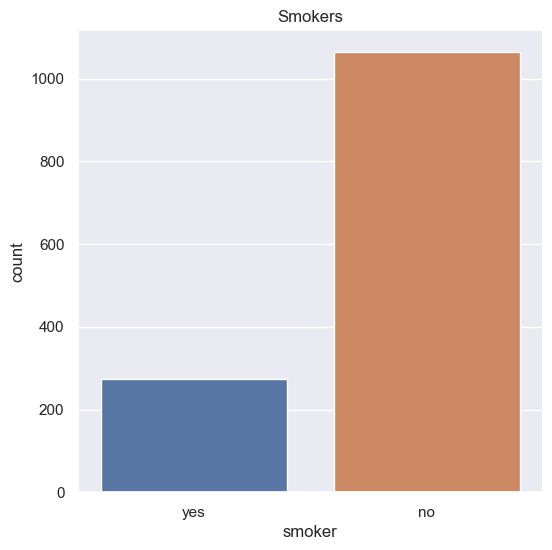

In [14]:
# Counting for smoker column

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smokers')
plt.show()

In [15]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

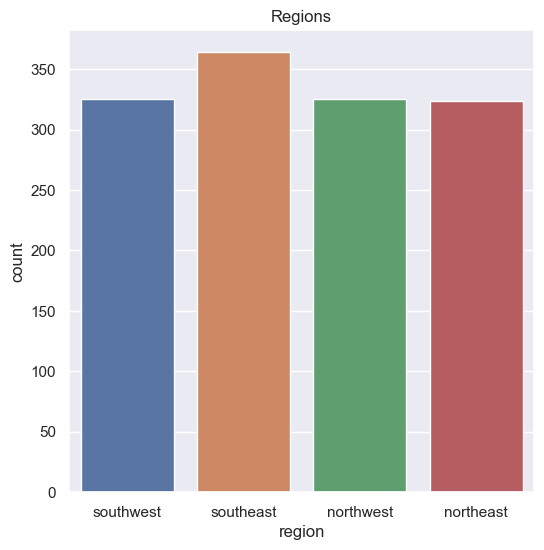

In [16]:
# Counting for region column

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title('Regions')
plt.show()

In [17]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

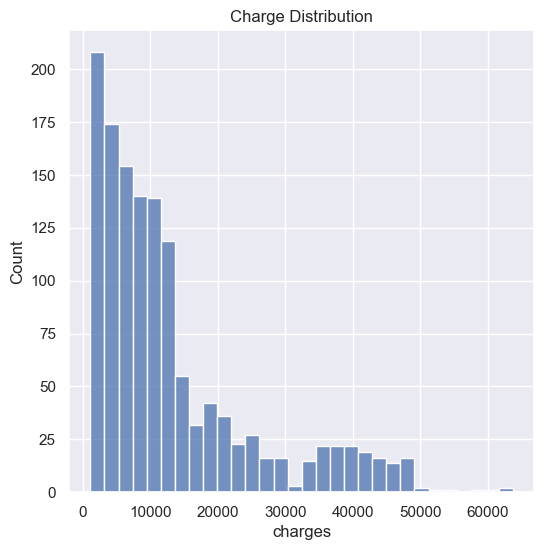

In [18]:
# Distribution of charges value

plt.figure(figsize=(6,6))
sns.histplot(insurance_data['charges'])
plt.title('Charge Distribution')
plt.show()

## Data Pre-Processing

##### Encoding the Categorical features

In [19]:
# Encoding sex column

insurance_data.replace({'sex':{'male':0 , 'female':1}} , inplace=True)

# Encoding sex column

insurance_data.replace({'smoker':{'yes':0 , 'no':1}} , inplace=True)

# Encoding sex column

insurance_data.replace({'region':{'southeast':0 , 'southwest':1 , 'northeast':2 , 'northwest':3}} , inplace=True)

##### Splitting the features and target

In [20]:
X = insurance_data.drop(columns='charges' , axis=1)
Y = insurance_data['charges']

In [21]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [22]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


##### Splitting the data into training data and testing data

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2 , random_state=2 )

In [24]:
# 80% of the data is in the training data and 20% for the testing data

print(X.shape , X_train.shape , X_test.shape)

(1338, 6) (1070, 6) (268, 6)


##  Model Training

##### Linear Regression

In [25]:
# Loading the linear regression model

regressor = LinearRegression()

In [31]:
regressor.fit(X_train , Y_train)

LinearRegression()

##### Model Evaluation

In [27]:
# prediction on training data

training_data_prediction = regressor.predict(X_train)

In [28]:
# R sqaured value 

r2_train = metrics.r2_score(Y_train , training_data_prediction)
print("R Squared Value : ", r2_train)

R Squared Value :  0.751505643411174


In [29]:
# prediction on test data

testing_data_prediction = regressor.predict(X_test)

In [30]:
# R sqaured value 

r2_test = metrics.r2_score(Y_test , testing_data_prediction)
print("R Squared Value : ", r2_test)

R Squared Value :  0.7447273869684077
